In [16]:
import numpy as np
import xarray as xr
import pickle
import pandas as pd
import time
import os

import datetime
import matplotlib.pyplot as plt



In [153]:
# Import Daily from latest Thursday's sitRep
df = pd.read_csv("ICU_age_20210819.csv",sep=",",index_col=0)

f =["00-17","18-29","30-39","40-49","50-59","60-69","70-79","80+"]
d = df.filter(["days since 2020-01-01"]+f).astype("int32")
d["date"] = pd.Timestamp("2020-01-01")+pd.TimedeltaIndex(d.index,"D")
d.index = d["date"]
daily = d.filter(f)

ex = daily.copy()
ex["publication"] = pd.Timestamp("2021-08-19")

ex.to_csv("icu_daily.csv",sep="\t")

In [156]:
# Import weekly DIVI fractions
df = pd.read_csv("../Data/ICU/DIVI/AgeGroupsFractions.csv",sep="\t",index_col=0,na_values=["?"],parse_dates=True)
del df["comment"]
df = df.rename(columns={"<18":"00-17"})

total = fraction.copy()
for k in f:
    total[k] = df[k]/100.*df["total"]*df["known"]/100.

fraction = fraction.filter(f)
total = total.filter(f).fillna(0).astype("int32")
total = total[total.index > pd.Timestamp("2021-05-13")]


In [157]:
print(total)

            00-17  18-29  30-39  40-49  50-59  60-69  70-79  80+
date                                                            
2021-08-19      8     21     53    105    137    151     88   38
2021-08-12      8     16     30     69    100    117     89   25
2021-08-05      3     12     28     42     96    109     68   17
2021-07-29      3      8     24     32     88    104     66   12
2021-07-22      4     15     18     36     82    117     55    7
2021-07-15      3     10     15     36     94    138     73   17
2021-07-08      3     11     16     53    113    165     83   12
2021-07-01      2     14     23     61    142    196    104   19
2021-06-24      2     11     32     77    169    263    142   35
2021-06-17      4     16     43     98    237    356    218   46
2021-06-10      8     21     54    130    329    502    326   79
2021-06-03      5     24     64    150    433    670    441  118
2021-05-27      7     33     70    211    565    847    685  187
2021-05-20     13     40 

<AxesSubplot:xlabel='date'>

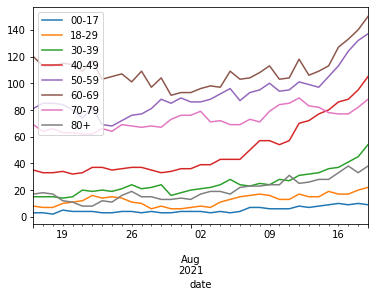

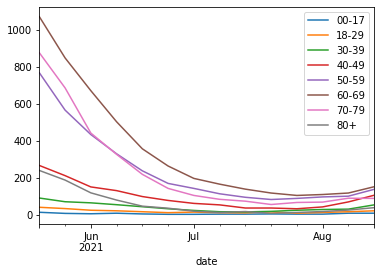

In [158]:
daily.plot()
total.plot()
